# **EDA Switzerland Story-telling**

# Story-Inputs

**Story-Inputs**:
- Involve the readers interests (Skiing)
- Progression of tourists in winter region/cable car usage


# Data Import

Set all import paths for this project

In [1]:
import sys
import os

database_path = 'C:\\Users\\simon\\Desktop\\FS2020-Project-Climate-Change\\database'
print(sys.path)

def import_system_path():
    if database_path not in sys.path:
        sys.path.append(database_path)
        print('New path added to Sys.')
    else:
        print('Path already exists.')
        
import_system_path()

['C:\\Users\\simon\\Desktop\\FS2020-Project-Climate-Change\\storytelling', 'C:\\Users\\simon\\anaconda3\\python37.zip', 'C:\\Users\\simon\\anaconda3\\DLLs', 'C:\\Users\\simon\\anaconda3\\lib', 'C:\\Users\\simon\\anaconda3', '', 'C:\\Users\\simon\\anaconda3\\lib\\site-packages', 'C:\\Users\\simon\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\simon\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\simon\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\simon\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\simon\\.ipython']
New path added to Sys.


In [135]:
from DBA import DBA
import yaml

import seaborn as sns
import pandas as pd
import numpy as np
import sqlalchemy
import matplotlib.pyplot as plt
import datetime

Read YML-File with Configuration data for database

In [3]:
a_yaml_file = open("config.yml")
parsed_yaml_file = yaml.load(a_yaml_file, Loader=yaml.FullLoader)
print(parsed_yaml_file)

{'sql': {'host': '86.119.42.47', 'user': 'db_user', 'pw': 'db_password', 'db': 'climate_change_db', 'port': '5432'}}


## DB Connection

Create connection object with all DB configurations

In [4]:
connection_object = DBA(parsed_yaml_file['sql']['db'], 
                        parsed_yaml_file['sql']['user'] , 
                        parsed_yaml_file['sql']['pw'] , 
                        parsed_yaml_file['sql']['host'], 
                        parsed_yaml_file['sql']['port']
                       )

Test-Query

In [5]:
connection_object.query_data('SELECT * FROM locations')

,location_id,latitude,longitude,region,country,alpha_3
0,1,None,None,Basel-Binningen,Switzerland,CHE
1,2,None,None,Bern-Zollikofen 1),Switzerland,CHE
2,3,None,None,Davos WSL 2),Switzerland,CHE
3,4,None,None,Genf-Cointrin,Switzerland,CHE
4,5,None,None,Locarno-Monti,Switzerland,CHE
...,...,...,...,...,...,...
213,214,None,None,None,Vietnam,VNM
214,215,None,None,None,Western Sahara,WBG
215,216,None,None,None,Yemen,YEM
216,217,None,None,None,Zambia,ZMB


## All Queries

In [7]:
class Queries():
    
    all_data_from_switzerland = """select locations.location_id, locations.region, locations.country, locations.alpha_3, 
                                   sensors.sensor_id, sensors.sensor_type,
                                   sensor_readings.timestamp, sensor_readings.int_reading, sensor_readings.float_reading, sensor_readings.bool_reading
                                   from locations
                                   inner join sensors on (sensors.location_id = locations.location_id)
                                   inner join sensor_readings on (sensors.sensor_id = sensor_readings.sensor_id)
                                   where locations.country = 'Switzerland'
                                   order by region, timestamp"""
    
    

## Query Data

In [280]:
swiss_all_data = connection_object.query_data(Queries.all_data_from_switzerland)
print(swiss_all_data.info())
swiss_all_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    4455 non-null   int64  
 1   region         1157 non-null   object 
 2   country        4455 non-null   object 
 3   alpha_3        4455 non-null   object 
 4   sensor_id      4455 non-null   int64  
 5   sensor_type    4455 non-null   object 
 6   timestamp      4455 non-null   object 
 7   int_reading    980 non-null    float64
 8   float_reading  3225 non-null   float64
 9   bool_reading   0 non-null      object 
dtypes: float64(2), int64(2), object(6)
memory usage: 348.2+ KB
None


,location_id,region,country,alpha_3,sensor_id,sensor_type,timestamp,int_reading,float_reading,bool_reading
0,1,Basel-Binningen,Switzerland,CHE,1,new_snow,1931-01-01,86.0,NaN,None
1,1,Basel-Binningen,Switzerland,CHE,1,new_snow,1932-01-01,41.0,NaN,None
2,1,Basel-Binningen,Switzerland,CHE,1,new_snow,1933-01-01,22.0,NaN,None
3,1,Basel-Binningen,Switzerland,CHE,1,new_snow,1934-01-01,19.0,NaN,None
4,1,Basel-Binningen,Switzerland,CHE,1,new_snow,1935-01-01,105.0,NaN,None


What kind of Data is available?

In [281]:
swiss_all_data['sensor_type'].unique()

array(['new_snow', 'temperature', 'co2'], dtype=object)

In [44]:
not_local_data = swiss_all_data[swiss_all_data['region'].isna() == True]
not_local_data = not_local_data.drop(['int_reading', 'bool_reading'], axis=1)
not_local_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3298 entries, 1157 to 4454
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    3298 non-null   int64  
 1   region         0 non-null      object 
 2   country        3298 non-null   object 
 3   alpha_3        3298 non-null   object 
 4   sensor_id      3298 non-null   int64  
 5   sensor_type    3298 non-null   object 
 6   timestamp      3298 non-null   object 
 7   float_reading  3225 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 231.9+ KB


In [279]:
not_local_data = not_local_data.fillna(method='ffill')
print('Summary of Temperature Data:')
print(not_local_data[not_local_data['sensor_type'] == 'temperature'].describe()['float_reading'])
print(50*'-')
print('Summary of CO2 Data')
print(not_local_data[not_local_data['sensor_type'] == 'co2'].describe()['float_reading'])

Summary of Temperature Data:
count    3239.000000
mean       -0.100099
std         1.636898
min        -8.228000
25%        -1.082500
50%        -0.059000
75%         0.986000
max         6.093000
Name: float_reading, dtype: float64
--------------------------------------------------
Summary of CO2 Data
count    59.000000
mean      5.827385
std       3.056822
min       1.872900
25%       2.728300
50%       5.161400
75%       8.909650
max      11.075100
Name: float_reading, dtype: float64


# Analysis Temperature/CO2

Analysis of the Temperature and CO2 values of Switzerland

Check which are the time differences between each measurement of CO2 and temperature

In [278]:
not_local_data.sample(2)

,location_id,region,country,alpha_3,sensor_id,sensor_type,timestamp,float_reading
2973,192,None,Switzerland,CHE,192,temperature,1895-03-01,-1.962
1772,192,None,Switzerland,CHE,192,temperature,1795-02-01,-1.710


In [235]:
temperature_switzerland = not_local_data[not_local_data['sensor_type'] == 'temperature']
temperature_switzerland = temperature_switzerland.set_index(temperature_switzerland['timestamp'])
temperature_switzerland.index = pd.to_datetime(temperature_switzerland.index)


time_shifted = temperature_switzerland.loc[:,'timestamp'].shift(1) 
time_diff = temperature_switzerland.loc[:,'timestamp'] - time_shifted
print('Temperature Measurement differences: {}'.format(time_diff.mean()))

temperature_switzerland.head()

Temperature Measurement differences: 30 days 10:29:16.639901


,location_id,region,country,alpha_3,sensor_id,sensor_type,timestamp,float_reading
timestamp,,,,,,,,
1743-11-01,192,None,Switzerland,CHE,192,temperature,1743-11-01,0.872
1743-12-01,192,None,Switzerland,CHE,192,temperature,1743-12-01,0.872
1744-01-01,192,None,Switzerland,CHE,192,temperature,1744-01-01,0.872
1744-02-01,192,None,Switzerland,CHE,192,temperature,1744-02-01,0.872
1744-03-01,192,None,Switzerland,CHE,192,temperature,1744-03-01,0.872


In [234]:
co2_switzerland = not_local_data[not_local_data['sensor_type'] == 'co2']
co2_switzerland = co2_switzerland.set_index(co2_switzerland['timestamp'])
co2_switzerland.index = pd.to_datetime(co2_switzerland.index)


time_shifted = co2_switzerland.loc[:,'timestamp'].shift(1) 
time_diff = co2_switzerland.loc[:,'timestamp'] - time_shifted
print('CO2 Measurement differences: {}'.format(time_diff.mean()))

co2_switzerland.head()

CO2 Measurement differences: 365 days 06:12:24.827586


,location_id,region,country,alpha_3,sensor_id,sensor_type,timestamp,float_reading
timestamp,,,,,,,,
1960-01-01,192,None,Switzerland,CHE,599,co2,1960-01-01,4.0647
1961-01-01,192,None,Switzerland,CHE,599,co2,1961-01-01,4.1924
1962-01-01,192,None,Switzerland,CHE,599,co2,1962-01-01,4.4014
1963-01-01,192,None,Switzerland,CHE,599,co2,1963-01-01,4.7206
1964-01-01,192,None,Switzerland,CHE,599,co2,1964-01-01,5.0205


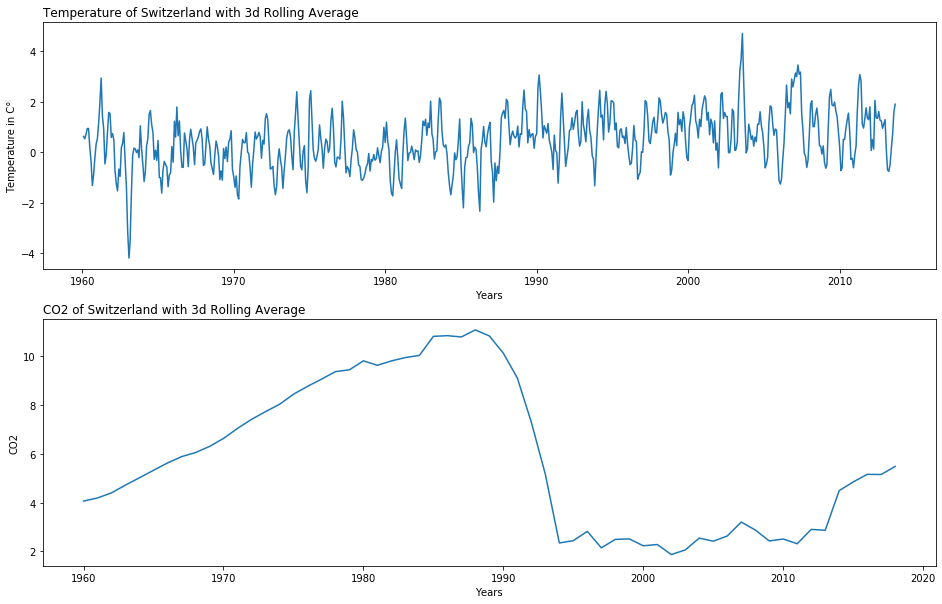

In [155]:
def plot_temperature_international(rolling_mean):
    fig, ax = plt.subplots(2, 1, figsize=(16,10))
    
    time_from = '1960-01-01'
    time_to =  2020
    
    temperature_switzerland = not_local_data[not_local_data['sensor_type'] == 'temperature']
    co2_switzerland = not_local_data[not_local_data['sensor_type'] == 'co2']
            
    p1_y = not_local_data[not_local_data['sensor_type'] == 'temperature']['timestamp']
    p1_y = p1_y[p1_y > pd.to_datetime(time_from)]
    
    p1 = sns.lineplot(x=p1_y, 
                      y=temperature_switzerland['float_reading'].rolling(rolling_mean).mean(), ax=ax[0], )
    p1.set_title('Temperature of Switzerland with {}d Rolling Average'.format(rolling_mean), loc='left')
    p1.set(ylabel='Temperature in C°', xlabel=('Years'))
    
    p1_y = not_local_data[not_local_data['sensor_type'] == 'temperature']['timestamp']
    p1_y = p1_y[p1_y > pd.to_datetime(time_from)]
    
    p2 = sns.lineplot(x=not_local_data[not_local_data['sensor_type'] == 'co2']['timestamp'], 
                      y=co2_switzerland['float_reading'], ax=ax[1])
    p2.set_title('CO2 of Switzerland with {}d Rolling Average'.format(rolling_mean), loc='left')
    p2.set(ylabel='CO2', xlabel=('Years'))
    
    plt.show()

plot_temperature_international(3)

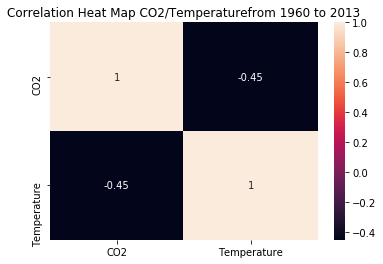

In [276]:
def temp_co2_correlation():
    temp_from_1960_yearly = temperature_switzerland.loc[temperature_switzerland.index > pd.to_datetime('1960-01-01')]['float_reading']
    temp_from_1960_yearly.index = pd.to_datetime(temp_from_1960_yearly.index)

    temp_from_1960_yearly = temp_from_1960_yearly.resample('Y').median()
    temp_from_1960_yearly.tail()
    
    co2_from_1960_yearly = co2_switzerland.loc[:'2013-01-01']['float_reading']

    corr_df = pd.concat([co2_from_1960_yearly, temp_from_1960_yearly], axis=1).resample('Y').median()
    corr_df.columns = ['CO2', 'Temperature']
    
    plot = sns.heatmap(corr_df.corr(), annot=True)
    plot.set_title('Correlation Heat Map CO2/Temperaturefrom {} to {}'.format(corr_df.index[0].year, corr_df.index[-1].year))
    plt.show()

temp_co2_correlation()